**About Dataset**
Context
Manufacturing process feature selection and categorization

Content
Abstract: Data from a semi-conductor manufacturing process

Data Set Characteristics: Multivariate
Number of Instances: 1567
Area: Computer
Attribute Characteristics: Real
Number of Attributes: 591
Date Donated: 2008-11-19
Associated Tasks: Classification, Causal-Discovery
Missing Values? Yes
A complex modern semi-conductor manufacturing process is normally under consistent
surveillance via the monitoring of signals/variables collected from sensors and or
process measurement points. However, not all of these signals are equally valuable
in a specific monitoring system. The measured signals contain a combination of
useful information, irrelevant information as well as noise. It is often the case
that useful information is buried in the latter two. Engineers typically have a
much larger number of signals than are actually required. If we consider each type
of signal as a feature, then feature selection may be applied to identify the most
relevant signals. The Process Engineers may then use these signals to determine key
factors contributing to yield excursions downstream in the process. This will
enable an increase in process throughput, decreased time to learning and reduce the
per unit production costs.

To enhance current business improvement techniques the application of feature
selection as an intelligent systems technique is being investigated.

The dataset presented in this case represents a selection of such features where
each example represents a single production entity with associated measured
features and the labels represent a simple pass/fail yield for in house line
testing, figure 2, and associated date time stamp. Where .1 corresponds to a pass
and 1 corresponds to a fail and the data time stamp is for that specific test
point.

Using feature selection techniques it is desired to rank features according to
their impact on the overall yield for the product, causal relationships may also be
considered with a view to identifying the key features.

Results may be submitted in terms of feature relevance for predictability using
error rates as our evaluation metrics. It is suggested that cross validation be
applied to generate these results. Some baseline results are shown below for basic
feature selection techniques using a simple kernel ridge classifier and 10 fold
cross validation.

Baseline Results: Pre-processing objects were applied to the dataset simply to
standardize the data and remove the constant features and then a number of
different feature selection objects selecting 40 highest ranked features were
applied with a simple classifier to achieve some initial results. 10 fold cross
validation was used and the balanced error rate (*BER) generated as our initial
performance metric to help investigate this dataset.

SECOM Dataset: 1567 examples 591 features, 104 fails

FSmethod (40 features) BER % True + % True - %
S2N (signal to noise) 34.5 +-2.6 57.8 +-5.3 73.1 +2.1
Ttest 33.7 +-2.1 59.6 +-4.7 73.0 +-1.8
Relief 40.1 +-2.8 48.3 +-5.9 71.6 +-3.2
Pearson 34.1 +-2.0 57.4 +-4.3 74.4 +-4.9
Ftest 33.5 +-2.2 59.1 +-4.8 73.8 +-1.8
Gram Schmidt 35.6 +-2.4 51.2 +-11.8 77.5 +-2.3

Attribute Information:

Key facts: Data Structure: The data consists of 2 files the dataset file SECOM
consisting of 1567 examples each with 591 features a 1567 x 591 matrix and a labels
file containing the classifications and date time stamp for each example.

As with any real life data situations this data contains null values varying in
intensity depending on the individuals features. This needs to be taken into
consideration when investigating the data either through pre-processing or within
the technique applied.

The data is represented in a raw text file each line representing an individual
example and the features seperated by spaces. The null values are represented by
the 'NaN' value as per MatLab.

In [2]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.1 MB/s eta 0:00:00


In [13]:

# Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report
from lightgbm import LGBMClassifier
from skopt import BayesSearchCV

In [5]:


#  Load Data
data = pd.read_csv("uci-secom.csv")
labels = data['Pass/Fail']
features = data.drop(columns=['Pass/Fail', 'Time'])  # Exclude non-sensor data like timestamp

# Handle Missing Values
# Impute missing values (NaNs) using the mean of each column
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Standardize the Data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Feature Selection
# Select top 40 features using ANOVA F-test
selector = SelectKBest(f_classif, k=40)
features_selected = selector.fit_transform(features_scaled, labels)

#  Split Data
X_train, X_test, y_train, y_test = train_test_split(features_selected, labels, test_size=0.2, random_state=42)



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  5  13  42  49  52  69  97 141 149 178 179 186 189 190 191 192 193 194
 226 229 230 231 232 233 234 235 236 237 240 241 242 243 256 257 258 259
 260 261 262 263 264 265 266 276 284 313 314 315 322 325 326 327 328 329
 330 364 369 370 371 372 373 374 375 378 379 380 381 394 395 396 397 398
 399 400 401 402 403 404 414 422 449 450 451 458 461 462 463 464 465 466
 481 498 501 502 503 504 505 506 507 508 509 512 513 514 515 528 529 530
 531 532 533 534 535 536 537 538] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [14]:
# Create and train the LightGBM model
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluation
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 80, number of negative: 1173
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8953
[LightGBM] [Info] Number of data points in the train set: 1253, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063847 -> initscore=-2.685293
[LightGBM] [Info] Start training from score -2.685293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Classification Report:
              precision    recall  f1-score   support

          -1       0.92      0.99      0.96       290
           1       0.00      0.00      0.00        24

    accuracy                           0.92       314
   macro avg       0.46      0.50      0.48       314
weighted avg       0.85      0.92      0.88       314



In [8]:

# LightGBM with Bayesian Optimization
lgbm_model = LGBMClassifier()

# Define the parameter search space for LightGBM
param_space_lgbm = {
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (3, 10),
    'n_estimators': (50, 500),
    'subsample': (0.5, 1.0)
}

# Use Bayesian optimization for hyperparameter tuning with LightGBM
bayes_cv_lgbm = BayesSearchCV(estimator=lgbm_model, search_spaces=param_space_lgbm, cv=10, n_iter=32, n_jobs=-1, random_state=42)

# Fit the LightGBM model
bayes_cv_lgbm.fit(X_train, y_train)

# Evaluate the LightGBM model
y_pred_lgbm = bayes_cv_lgbm.best_estimator_.predict(X_test)
ber_lgbm = balanced_accuracy_score(y_test, y_pred_lgbm)

print(f"Balanced Error Rate (LightGBM): {1 - ber_lgbm:.4f}")
print(f"Best Parameters (LightGBM): {bayes_cv_lgbm.best_params_}")



[LightGBM] [Info] Number of positive: 80, number of negative: 1173
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8953
[LightGBM] [Info] Number of data points in the train set: 1253, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063847 -> initscore=-2.685293
[LightGBM] [Info] Start training from score -2.685293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [15]:
# Create the LightGBM model with the best parameters
best_params = {
    'learning_rate': 0.010486266869304801,
    'max_depth': 3,
    'n_estimators': 64,
    'subsample': 0.529750181575546
}

# Initialize and train the LightGBM model
model = LGBMClassifier(**best_params)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

[LightGBM] [Info] Number of positive: 80, number of negative: 1173
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8953
[LightGBM] [Info] Number of data points in the train set: 1253, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063847 -> initscore=-2.685293
[LightGBM] [Info] Start training from score -2.685293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [16]:
# Evaluation
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))

LightGBM Classification Report:
              precision    recall  f1-score   support

          -1       0.92      0.99      0.96       290
           1       0.00      0.00      0.00        24

    accuracy                           0.92       314
   macro avg       0.46      0.50      0.48       314
weighted avg       0.85      0.92      0.88       314



In [ ]:
# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier()
# Change class labels from -1 and 1 to 0 and 1
# Use astype(int) to ensure the result is integer
y_train = ((y_train + 1) / 2).astype(int)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
#Remap the predicted values back to -1 and 1
y_pred_xgb = (y_pred_xgb * 2) -1

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

          -1       0.93      0.99      0.96       290
           1       0.40      0.08      0.14        24

    accuracy                           0.92       314
   macro avg       0.66      0.54      0.55       314
weighted avg       0.89      0.92      0.90       314



In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:

# Apply SMOTE to generate synthetic samples for the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# Change class labels from -1 and 1 to 0 and 1 for y_resampled
# Use astype(int) to ensure the result is integer
y_resampled = ((y_resampled + 1) / 2).astype(int)

# Train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)
#Remap the predicted values back to -1 and 1
y_pred_xgb = (y_pred * 2) -1

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:07:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

          -1       0.93      0.94      0.94       290
           1       0.22      0.21      0.21        24

    accuracy                           0.88       314
   macro avg       0.58      0.57      0.57       314
weighted avg       0.88      0.88      0.88       314

Confusion Matrix:
[[  0 272  18]
 [  0   0   0]
 [  0  19   5]]

Classification Report:


In [17]:
#  Model Building - XGBoost with Bayesian Optimization
xgb_model = xgb.XGBClassifier()

# Define the parameter search space
param_space = {
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (3, 10),
    'n_estimators': (50, 500),
    'subsample': (0.5, 1.0)
}

# Use Bayesian optimization for hyperparameter tuning
bayes_cv = BayesSearchCV(estimator=xgb_model, search_spaces=param_space, cv=10, n_iter=32, n_jobs=-1, random_state=42)

# Ensure labels are 0 and 1
y_train = y_train.replace(-1, 0)

# Fit the model
bayes_cv.fit(X_train, y_train)

# Evaluate the model
y_pred = bayes_cv.best_estimator_.predict(X_test)
ber = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Error Rate: {1 - ber:.4f}")
print(f"Best Parameters: {bayes_cv.best_params_}")




Balanced Error Rate: 1.0000
Best Parameters: OrderedDict([('learning_rate', 0.010001895862575045), ('max_depth', 8), ('n_estimators', 71), ('subsample', 0.9494077575579702)])


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [18]:
# Define the best parameters
best_params = {
    'learning_rate': 0.010001895862575045,
    'max_depth': 8,
    'n_estimators': 71,
    'subsample': 0.9494077575579702,
    'objective': 'binary:logistic'
}

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(**best_params)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Balanced Error Rate (BER)
ber = 1 - balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Error Rate (BER): {ber:.4f}")

Balanced Error Rate (BER): 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2480: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [20]:
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))


XGBoost Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00     290.0
           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00      24.0

    accuracy                           0.00     314.0
   macro avg       0.00      0.00      0.00     314.0
weighted avg       0.00      0.00      0.00     314.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

# outliers

In [ ]:
# Required Libraries for Data Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
data = pd.read_csv("uci-secom.csv")  # Replace with your dataset path

# General Information
print("Data Shape:", data.shape)
print("\nData Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())



Data Shape: (1567, 592)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB
None

Summary Statistics:
                 0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553


Missing Values:
0       6
1       7
2      14
3      14
4      14
       ..
585     1
586     1
587     1
588     1
589     1
Length: 538, dtype: int64


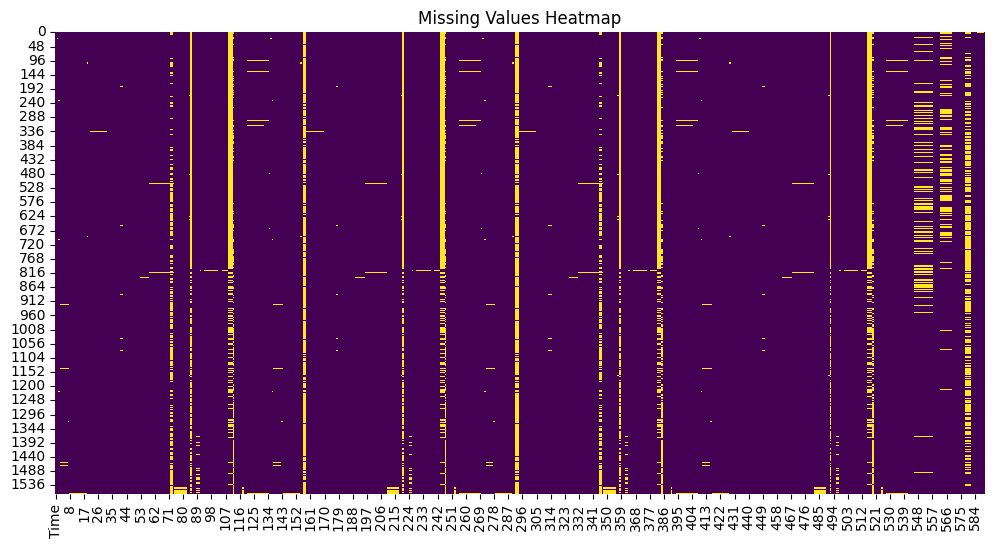

In [ ]:
# Check Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Visualize Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()



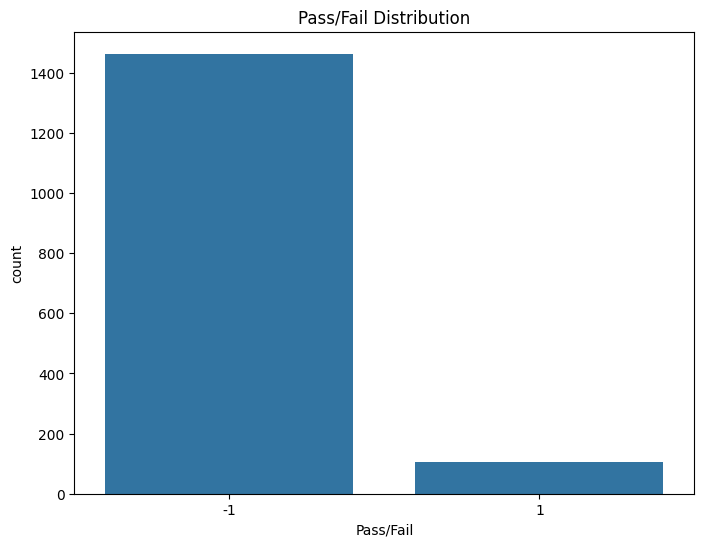

<ipython-input-127-87f1a3477f89>:10: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


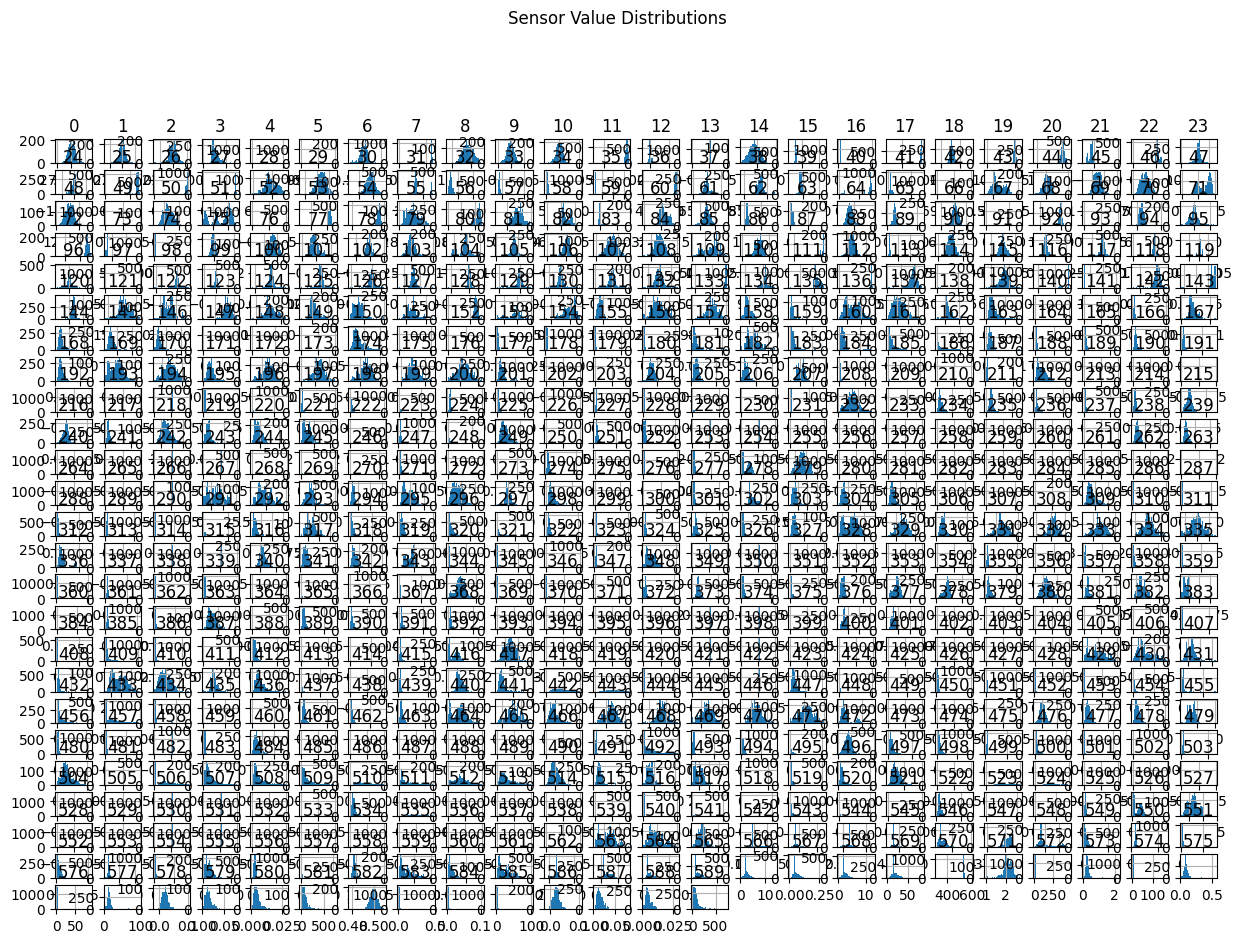

In [ ]:
#  Distribution of Pass/Fail
plt.figure(figsize=(8, 6))
sns.countplot(x='Pass/Fail', data=data)
plt.title('Pass/Fail Distribution')
plt.show()

#  Distribution of Sensor Values (Histogram)
data.drop(columns=['Pass/Fail', 'Time']).hist(figsize=(15, 10), bins=30)
plt.suptitle('Sensor Value Distributions', y=1.01)
plt.tight_layout()
plt.show()






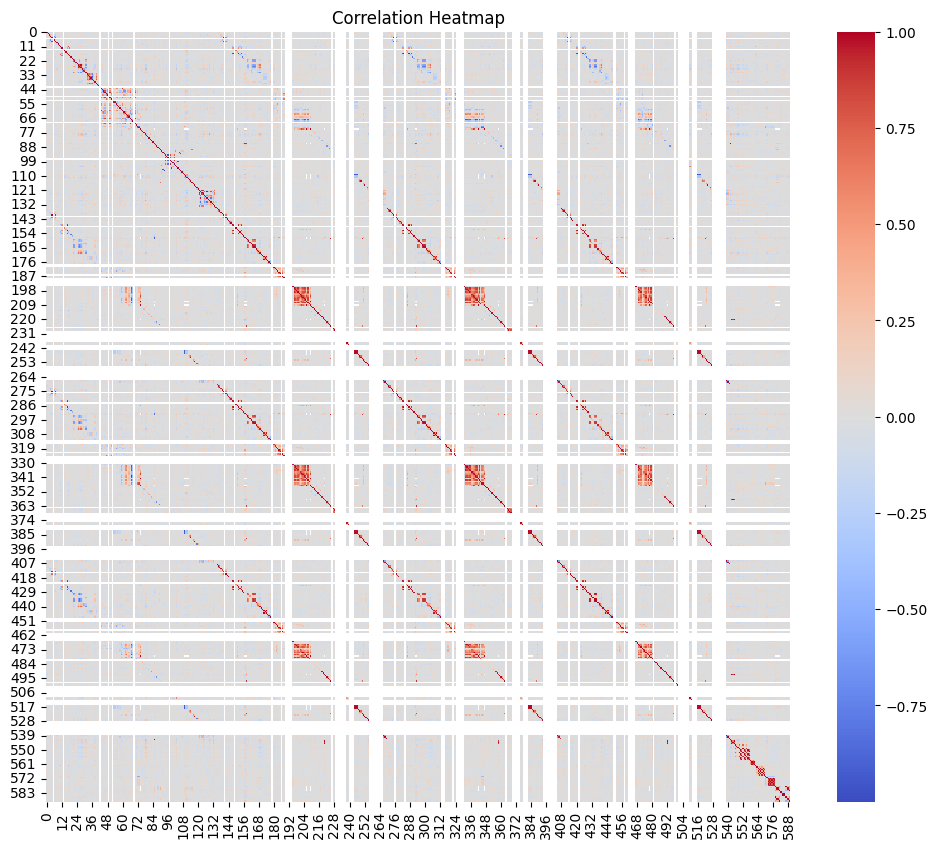

In [ ]:
#  Correlation Matrix (Exclude non-numeric columns like 'Time' and 'Pass/Fail')
numeric_data = data.drop(columns=['Time', 'Pass/Fail'])  # Remove non-numeric columns

# Now compute the correlation matrix for numeric data only
correlation_matrix = numeric_data.corr()

# Visualize Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


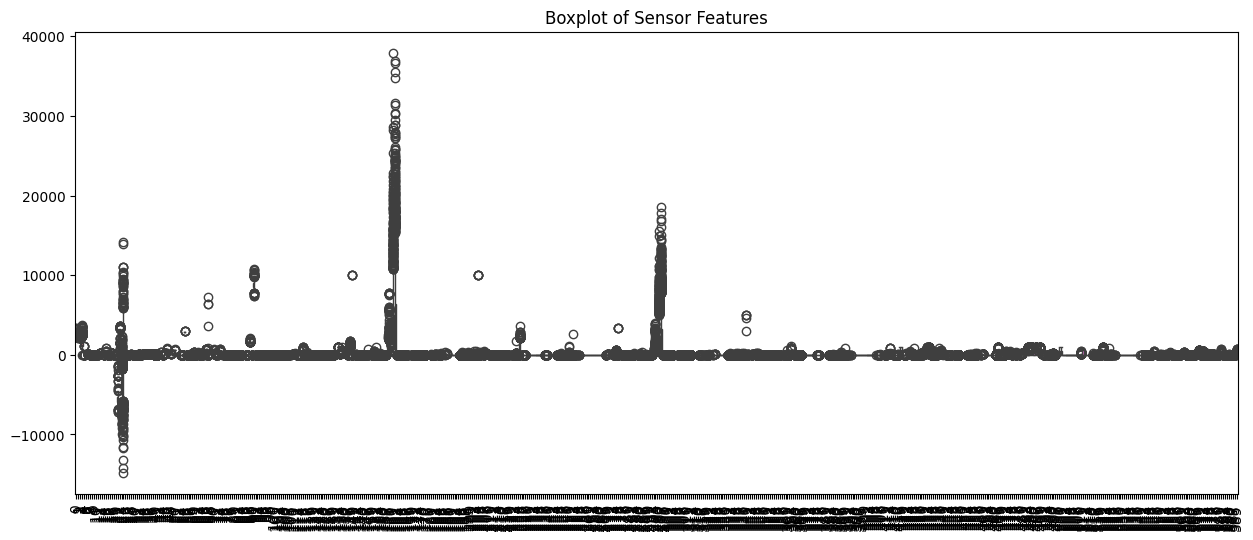

In [ ]:
# Boxplot of Sensor Data (for outliers)
plt.figure(figsize=(15, 6))
sns.boxplot(data=data.drop(columns=['Pass/Fail', 'Time']))
plt.xticks(rotation=90)
plt.title('Boxplot of Sensor Features')
plt.show()



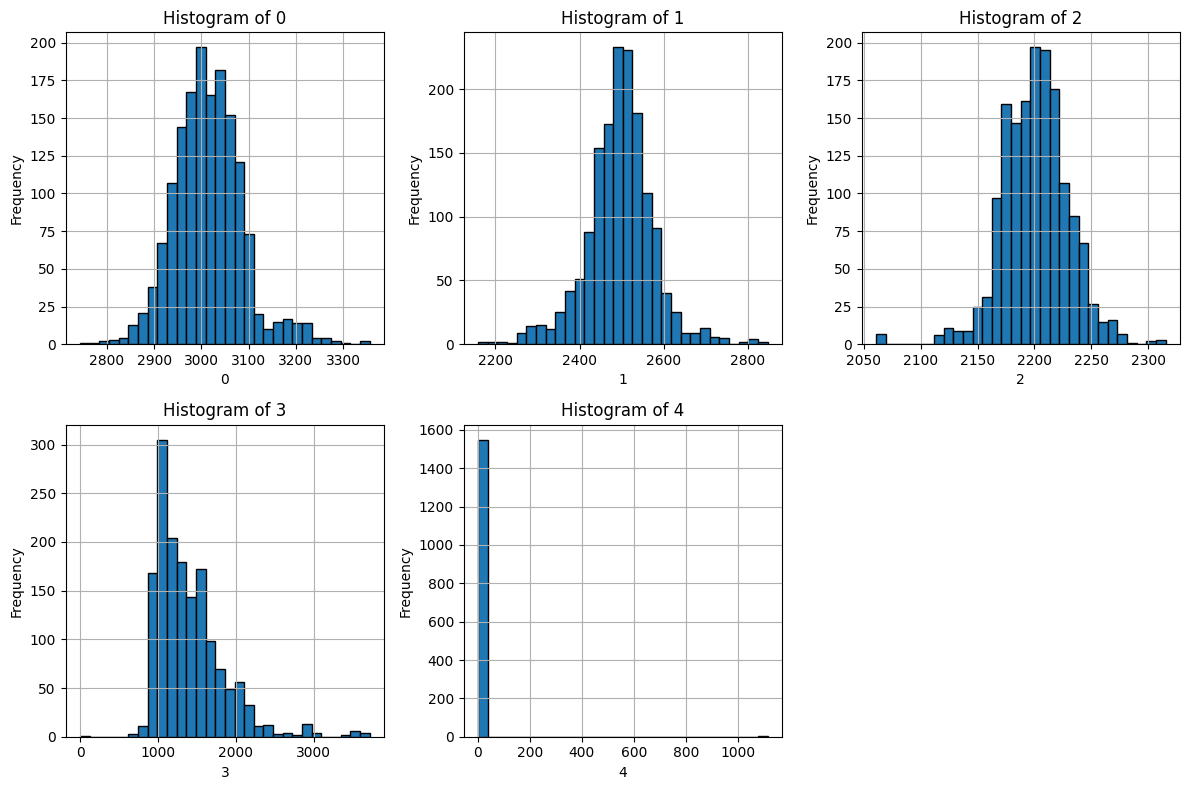

In [ ]:
import matplotlib.pyplot as plt
data1=data.drop(columns=['Pass/Fail', 'Time'])
# Choose 5 columns from your dataset for histograms
columns_to_plot = data1.columns[:5]  # Adjust if you want specific columns

# Plot histograms for the selected columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Create a 2x3 grid for up to 6 plots
    data[column].hist(bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:


# Function to identify outliers
def find_outliers_iqr(df):
    outlier_columns = {}

    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:  # Check only numerical columns
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
            if not outliers.empty:
                outlier_columns[column] = outliers

    return outlier_columns

# Identify outlier columns
outlier_columns = find_outliers_iqr(data)

# Display outlier columns and their counts
for column, outliers in outlier_columns.items():
    print(f"Column: {column}, Outliers Count: {len(outliers)}")


Column: 0, Outliers Count: 50
Column: 1, Outliers Count: 86
Column: 2, Outliers Count: 31
Column: 3, Outliers Count: 51
Column: 4, Outliers Count: 48
Column: 6, Outliers Count: 98
Column: 7, Outliers Count: 12
Column: 8, Outliers Count: 6
Column: 9, Outliers Count: 26
Column: 10, Outliers Count: 30
Column: 11, Outliers Count: 8
Column: 12, Outliers Count: 12
Column: 14, Outliers Count: 11
Column: 15, Outliers Count: 7
Column: 16, Outliers Count: 35
Column: 17, Outliers Count: 16
Column: 18, Outliers Count: 12
Column: 19, Outliers Count: 46
Column: 20, Outliers Count: 29
Column: 21, Outliers Count: 36
Column: 22, Outliers Count: 53
Column: 23, Outliers Count: 194
Column: 24, Outliers Count: 119
Column: 25, Outliers Count: 39
Column: 26, Outliers Count: 39
Column: 27, Outliers Count: 24
Column: 28, Outliers Count: 5
Column: 29, Outliers Count: 11
Column: 30, Outliers Count: 12
Column: 31, Outliers Count: 354
Column: 32, Outliers Count: 27
Column: 33, Outliers Count: 54
Column: 34, Outlie

In [ ]:
# Removing outliers
for column in outlier_columns.keys():
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [ ]:
labels = data['Pass/Fail']
features = data.drop(columns=['Pass/Fail', 'Time'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier()
# Change class labels from -1 and 1 to 0 and 1
# Use astype(int) to ensure the result is integer
y_train = ((y_train + 1) / 2).astype(int)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
#Remap the predicted values back to -1 and 1
y_pred_xgb = (y_pred_xgb * 2) -1

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

###third method
Time series convert into month, day, week and hour. Used PCA to reduce dimensonality

In [ ]:
import pandas as pd

In [ ]:
#dataset load using pandas
df = pd.read_csv('uci-secom.csv')

In [ ]:
df.isnull().sum()

,0
Time,0
0,0
1,0
2,0
3,0
...,...
586,0
587,0
588,0
589,0


In [ ]:
# Select only float64 columns to fit the imputer
float64_cols = df.select_dtypes(include=['float64']).columns
df[float64_cols] = imputer.fit_transform(df[float64_cols])

print(df)

                     Time        0        1          2          3       4  \
0     2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5         6       7         8  ...         581     582     583  \

In [ ]:
# Load Data
#data = pd.read_csv("SECOM.csv")  # Replace with your dataset path
#labels = data['Pass/Fail']
features = df.drop(columns=['Pass/Fail'])  # Exclude non-sensor data like timestamp

#  Handle Missing Values
# Impute missing values (NaNs) using the mean of each column
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

In [ ]:
df.head(55)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.930000,2564.00,2187.733300,1411.126500,1.360200,100.0,97.613300,0.1242,1.5005,...,97.934373,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,2008-07-19 12:32:00,3095.780000,2465.14,2230.422200,1463.660600,0.829400,100.0,102.343300,0.1247,1.4966,...,208.204500,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.610000,2559.94,2186.411100,1698.017200,1.510200,100.0,95.487800,0.1241,1.4436,...,82.860200,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.720000,2479.90,2199.033300,909.792600,1.320400,100.0,104.236700,0.1217,1.4882,...,73.843200,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.240000,2502.87,2233.366700,1326.520000,1.533400,100.0,100.396700,0.1235,1.5031,...,97.934373,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1
5,2008-07-19 17:53:00,2946.250000,2432.84,2233.366700,1326.520000,1.533400,100.0,100.396700,0.1235,1.5287,...,44.007700,0.4949,0.0189,0.0044,3.8276,0.034200,0.015100,0.005200,44.007700,-1
6,2008-07-19 19:44:00,3030.270000,2430.12,2230.422200,1463.660600,0.829400,100.0,102.343300,0.1247,1.5816,...,97.934373,0.5010,0.0143,0.0042,2.8515,0.034200,0.015100,0.005200,44.007700,-1
7,2008-07-19 19:45:00,3058.880000,2690.15,2248.900000,1004.469200,0.788400,100.0,106.240000,0.1185,1.5153,...,95.031000,0.4984,0.0106,0.0034,2.1261,0.020400,0.019400,0.006300,95.031000,-1
8,2008-07-19 20:24:00,2967.680000,2600.47,2248.900000,1004.469200,0.788400,100.0,106.240000,0.1185,1.5358,...,111.652500,0.4993,0.0172,0.0046,3.4456,0.011100,0.012400,0.004500,111.652500,-1
9,2008-07-19 21:35:00,3016.110000,2428.37,2248.900000,1004.469200,0.788400,100.0,106.240000,0.1185,1.5381,...,90.229400,0.4967,0.0152,0.0038,3.0687,0.021200,0.019100,0.007300,90.229400,-1


In [ ]:
import pandas as pd

# Convert the Time column to datetime
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')


In [ ]:
# Extract useful time components
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month
df['Day'] = df['Time'].dt.day
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Second'] = df['Time'].dt.second
df['DayOfWeek'] = df['Time'].dt.dayofweek  # Monday=0, Sunday=6


<ipython-input-41-148872654d13>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Year'] = df['Time'].dt.year
<ipython-input-41-148872654d13>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Month'] = df['Time'].dt.month
<ipython-input-41-148872654d13>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

In [ ]:
#df.set_index('Time', inplace=True)


In [ ]:
df.head(5)

,Time,0,1,2,3,4,5,6,7,8,...,588,589,Pass/Fail,Year,Month,Day,Hour,Minute,Second,DayOfWeek
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,0.005283,99.670066,-1,2008,7,19,11,55,0,5
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,0.006000,208.204500,-1,2008,7,19,12,32,0,5
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,0.014800,82.860200,1,2008,7,19,13,17,0,5
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,0.004400,73.843200,-1,2008,7,19,14,43,0,5
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,0.004400,73.843200,-1,2008,7,19,15,22,0,5


In [ ]:
df.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '588', '589', 'Pass/Fail', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'Second', 'DayOfWeek'],
      dtype='object', length=599)

In [ ]:
import pandas as pd

# Assuming 'Time' column is in string format, convert it to datetime
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')


In [ ]:
# Calculate the difference between consecutive time points
df['Time_Diff'] = df['Time'].diff()

# Display the time differences
print(df[['Time', 'Time_Diff']].head(10))  # Display first 10 rows


                 Time       Time_Diff
0 2008-07-19 11:55:00             NaT
1 2008-07-19 12:32:00 0 days 00:37:00
2 2008-07-19 13:17:00 0 days 00:45:00
3 2008-07-19 14:43:00 0 days 01:26:00
4 2008-07-19 15:22:00 0 days 00:39:00
5 2008-07-19 17:53:00 0 days 02:31:00
6 2008-07-19 19:44:00 0 days 01:51:00
7 2008-07-19 19:45:00 0 days 00:01:00
8 2008-07-19 20:24:00 0 days 00:39:00
9 2008-07-19 21:35:00 0 days 01:11:00


<ipython-input-46-3388f91cf046>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Time_Diff'] = df['Time'].diff()


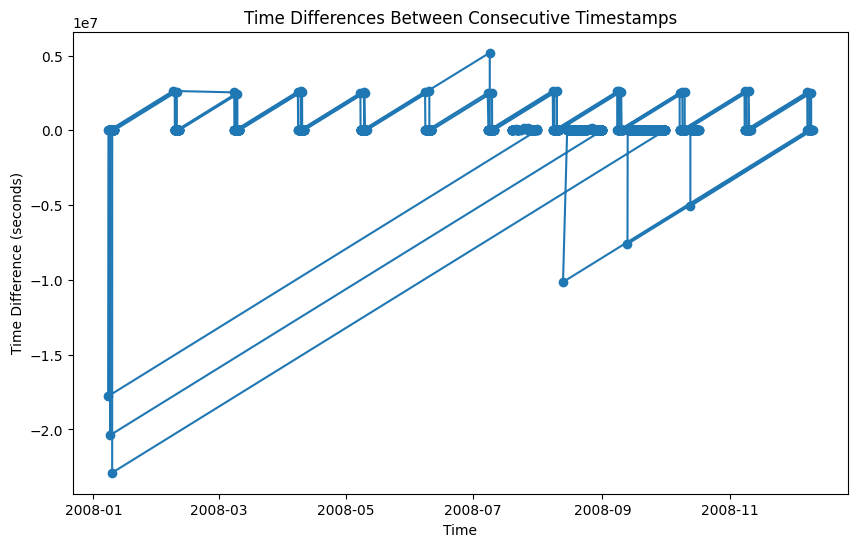

In [ ]:
import matplotlib.pyplot as plt

# Plot the time differences
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Time_Diff'].dt.total_seconds(), marker='o')
plt.ylabel('Time Difference (seconds)')
plt.xlabel('Time')
plt.title('Time Differences Between Consecutive Timestamps')
plt.show()


In [ ]:

# Set 'Time' as the index if it's not already
df.set_index('Time', inplace=True)






In [ ]:
# Check for duplicate values in the index
duplicate_index = df.index.duplicated()

# If duplicates exist, decide how to handle them
if duplicate_index.any():
    #  Remove duplicates
    df = df[~duplicate_index]



# Resample to hourly intervals and forward fill missing values
df_resampled = df.resample('H').ffill()



In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,589,Pass/Fail,Year,Month,Day,Hour,Minute,Second,DayOfWeek,Time_Diff
Time,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,99.670066,-1,2008,7,19,11,55,0,5,NaT
2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.204500,-1,2008,7,19,12,32,0,5,0 days 00:37:00
2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.860200,1,2008,7,19,13,17,0,5,0 days 00:45:00
2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.843200,-1,2008,7,19,14,43,0,5,0 days 01:26:00
2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,73.843200,-1,2008,7,19,15,22,0,5,0 days 00:39:00


In [ ]:
# Convert Time_Diff to total seconds and use it as a feature
df['Time_Diff_seconds'] = df['Time_Diff'].dt.total_seconds()


<ipython-input-52-5598d5b9375d>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Time_Diff_seconds'] = df['Time_Diff'].dt.total_seconds()


In [ ]:
# Example of forward filling missing values after resampling
df_resampled.ffill(inplace=True)


In [ ]:
# Get rows with any NaN values
nan_rows = df[df.isna().any(axis=1)]

print("Rows with any NaN values:")
print(nan_rows)

# Get specific columns that contain NaN values
nan_columns = df.columns[df.isna().any()].tolist()

print("\nColumns with NaN values:")
print(nan_columns)



Rows with any NaN values:
                           0       1          2          3       4      5  \
Time                                                                        
2008-07-19 11:55:00  3030.93  2564.0  2187.7333  1411.1265  1.3602  100.0   

                           6       7       8       9  ...  Pass/Fail  Year  \
Time                                                  ...                    
2008-07-19 11:55:00  97.6133  0.1242  1.5005  0.0162  ...         -1  2008   

                     Month  Day  Hour  Minute  Second  DayOfWeek  \
Time                                                               
2008-07-19 11:55:00      7   19    11      55       0          5   

                               Time_Diff  Time_Diff_seconds  
Time                                                         
2008-07-19 11:55:00  1970-01-01 00:00:00                NaN  

[1 rows x 600 columns]

Columns with NaN values:
['Time_Diff_seconds']


In [ ]:
# Replace NaN values with 0 in the 'Time_Diff_seconds' column
df['Time_Diff_seconds'] = df['Time_Diff_seconds'].fillna(0)

print("\nDataFrame after replacing NaN with 0 in 'Time_Diff_seconds':")
print(df)


DataFrame after replacing NaN with 0 in 'Time_Diff_seconds':
                           0        1          2          3       4      5  \
Time                                                                         
2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   
...                      ...      ...        ...        ...     ...    ...   
2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843  100.0   
2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763  100.0   
2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236  100.0   
2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726  100.0   
20

In [ ]:
# Replace NaT with 0 in the 'time_diff' column
df['Time_Diff'] = df['Time_Diff'].fillna(pd.Timestamp(0))

print("\nDataFrame after replacing NaT with 0 in 'time_diff':")
print(df)


DataFrame after replacing NaT with 0 in 'time_diff':
                           0        1          2          3       4      5  \
Time                                                                         
2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   
...                      ...      ...        ...        ...     ...    ...   
2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843  100.0   
2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763  100.0   
2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236  100.0   
2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726  100.0   
2008-10-17

In [ ]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
Minute,0
Second,0
DayOfWeek,0
Time_Diff,0


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,Pass/Fail,Year,Month,Day,Hour,Minute,Second,DayOfWeek,Time_Diff,Time_Diff_seconds
Time,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.500500,0.016200,...,-1,2008,7,19,11,55,0,5,1970-01-01 00:00:00,0.0
2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.496600,-0.000500,...,-1,2008,7,19,12,32,0,5,0 days 00:37:00,2220.0
2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.443600,0.004100,...,1,2008,7,19,13,17,0,5,0 days 00:45:00,2700.0
2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.488200,-0.012400,...,-1,2008,7,19,14,43,0,5,0 days 01:26:00,5160.0
2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.503100,-0.003100,...,-1,2008,7,19,15,22,0,5,0 days 00:39:00,2340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.342400,-0.004500,...,-1,2008,10,16,15,13,0,3,0 days 00:11:00,660.0
2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.433300,-0.006100,...,-1,2008,10,16,20,49,0,3,0 days 05:36:00,20160.0
2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.462862,-0.000841,...,-1,2008,10,17,5,26,0,4,0 days 08:37:00,31020.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1534 entries, 2008-07-19 11:55:00 to 2008-10-17 06:07:00
Columns: 600 entries, 0 to Time_Diff_seconds
dtypes: float64(591), int32(7), int64(1), timedelta64[ns](1)
memory usage: 7.0 MB


##regular and irregular resmapled

In [ ]:
print(df_resampled.head())

                           0        1          2          3       4      5  \
Time                                                                         
2008-01-08 02:00:00      NaN      NaN        NaN        NaN     NaN    NaN   
2008-01-08 03:00:00  3016.64  2492.80  2246.4889  1006.9548  1.0997  100.0   
2008-01-08 04:00:00  3016.64  2492.80  2246.4889  1006.9548  1.0997  100.0   
2008-01-08 05:00:00  3016.64  2492.80  2246.4889  1006.9548  1.0997  100.0   
2008-01-08 06:00:00  2980.84  2628.76  2187.5222  1268.6598  1.4503  100.0   

                            6       7       8       9  ...       589  \
Time                                                   ...             
2008-01-08 02:00:00       NaN     NaN     NaN     NaN  ...       NaN   
2008-01-08 03:00:00  103.3222  0.1184  1.5068  0.0126  ...   20.8909   
2008-01-08 04:00:00  103.3222  0.1184  1.5068  0.0126  ...   20.8909   
2008-01-08 05:00:00  103.3222  0.1184  1.5068  0.0126  ...   20.8909   
2008-01-08 06:00:00  

In [ ]:

# Remove the first row (index 0)
df_resampled = df_resampled.drop(index='2008-01-08 02:00:00').reset_index(drop=True)



In [ ]:
df_resampled.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
Hour,0
Minute,0
Second,0
DayOfWeek,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# Separate features and target
X = df.drop(columns=['Pass/Fail'])  # Features
y = df['Pass/Fail']  # Target

# Identify numeric features
numeric_features = X.select_dtypes(include=['float64', 'int']).columns

# Normalize or standardize numeric features
# For normalization
scaler = MinMaxScaler()
X_normalized = X.copy()
X_normalized[numeric_features] = scaler.fit_transform(X[numeric_features])

# Combine processed data back with the target

processed_data = pd.concat([X_normalized, y], axis=1)


print(processed_data.head())

                            0         1         2         3         4    5  \
Time                                                                         
2008-07-19 11:55:00  0.469231  0.589292  0.499096  0.379841  0.000609  0.0   
2008-07-19 12:32:00  0.575003  0.445535  0.666763  0.393982  0.000133  0.0   
2008-07-19 13:17:00  0.308868  0.583388  0.493903  0.457065  0.000744  0.0   
2008-07-19 14:43:00  0.400385  0.466998  0.543479  0.244894  0.000574  0.0   
2008-07-19 15:22:00  0.471367  0.500400  0.678327  0.357067  0.000765  0.0   

                            6         7         8         9  ...  Year  \
Time                                                         ...         
2008-07-19 11:55:00  0.328562  0.965785  0.665019  0.542479  ...   0.0   
2008-07-19 12:32:00  0.428942  0.969673  0.656639  0.412315  ...   0.0   
2008-07-19 13:17:00  0.283455  0.965008  0.542759  0.448168  ...   0.0   
2008-07-19 14:43:00  0.469123  0.946345  0.638590  0.319564  ...   0.0   
2008-07-1

In [ ]:
# Separate features and target
X = df.drop(columns=['Pass/Fail'])  # Features
y = df['Pass/Fail']  # Target

# Normalize numeric features
scaler = MinMaxScaler()
X_normalized = X.copy()
X_normalized[X.select_dtypes(include=['float64', 'int']).columns] = scaler.fit_transform(X.select_dtypes(include=['float64', 'int']))

# Keep only numeric features for PCA
X_processed = X_normalized.select_dtypes(include=['float64', 'int'])

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_processed)

# Create a new DataFrame with PCA features
pca_columns = [f'PC{i + 1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Combine PCA features with the target variable
final_data = pd.concat([X_pca_df, y.reset_index(drop=True)], axis=1)

print(final_data.head())

# Optional: Check the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.005400  0.415923  0.380548 -0.380494  0.049326  0.189266  0.873133   
1 -0.475398  0.647318  0.544248 -0.026011 -0.418870  0.138555  0.525675   
2 -0.624446  0.327798  0.198313 -0.109150  0.005475  0.174312  0.714947   
3 -0.600056 -0.026189 -0.167894 -0.398999  0.211113 -0.022536  0.378199   
4 -0.375672 -0.095406 -0.362371  0.100338 -0.253057 -0.193708 -0.297362   

        PC8       PC9      PC10  ...     PC133     PC134     PC135     PC136  \
0  0.093174  0.206156 -0.219660  ... -0.028059 -0.051670  0.047654  0.080629   
1  0.157627  0.481514 -0.028300  ... -0.119105 -0.136257 -0.066572  0.045088   
2  0.476517  0.166597 -0.295461  ... -0.058456 -0.108420 -0.062681  0.004182   
3  0.473214 -0.092137 -0.031676  ...  0.255514  0.095222  0.372293 -0.178297   
4  0.421314  0.336749  0.289802  ... -0.301652  0.118292  0.027216 -0.270686   

      PC137     PC138     PC139     PC140     PC141  Pass/Fail  
0  

In [ ]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print(cumulative_variance)


[0.05087393 0.08877325 0.12362481 0.15393891 0.18181785 0.20727322
 0.2303636  0.25208658 0.27223526 0.2919416  0.31030342 0.32777978
 0.34455285 0.36122894 0.37733383 0.39257849 0.40689547 0.42096696
 0.43455965 0.4481317  0.46128589 0.47401028 0.48622763 0.49804728
 0.50958666 0.52084606 0.53177035 0.54228967 0.55255488 0.56253622
 0.57194558 0.58112898 0.59028797 0.59905466 0.607668   0.61605113
 0.62426567 0.63213551 0.63985762 0.64736769 0.65473571 0.66185033
 0.66883917 0.67576171 0.6825323  0.6891435  0.6955342  0.7017345
 0.70785889 0.71389357 0.71988676 0.7256759  0.73128123 0.73661897
 0.74185605 0.74698366 0.7520734  0.75705439 0.76187848 0.7665953
 0.77119714 0.77575892 0.78014737 0.78438592 0.78857851 0.79251476
 0.79636886 0.80019508 0.8039315  0.80750003 0.81104771 0.8144827
 0.81788477 0.82125505 0.82454142 0.82773173 0.83087047 0.83396992
 0.83697215 0.83993455 0.84285014 0.84571183 0.84856182 0.85132025
 0.85400929 0.85662155 0.85922392 0.86179675 0.86433739 0.8668236

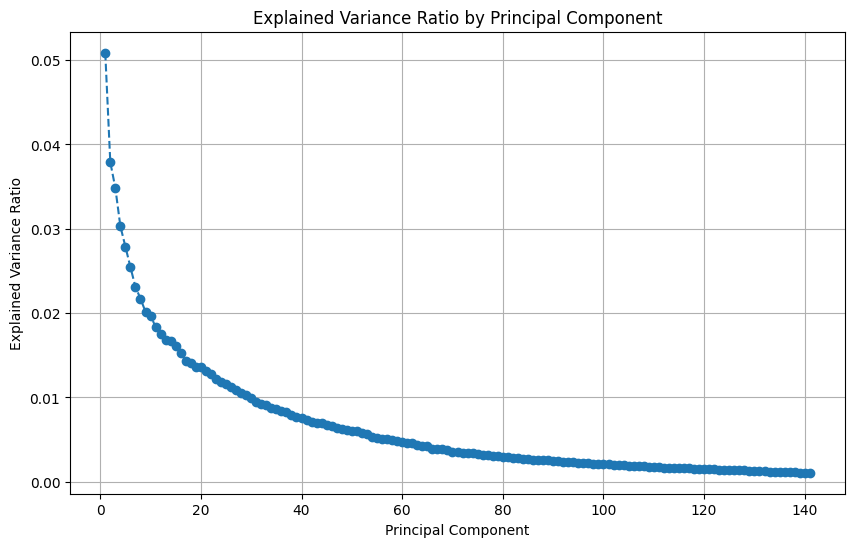

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, df['Pass/Fail'], test_size=0.2, random_state=42)

# Train a model (example with Random Forest)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.93      1.00      0.96       286
           1       0.00      0.00      0.00        21

    accuracy                           0.93       307
   macro avg       0.47      0.50      0.48       307
weighted avg       0.87      0.93      0.90       307



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import lightgbm as lgb
import xgboost as xgb

##model

In [ ]:
# Create and train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Predictions
y_pred_lgb = lgb_model.predict(X_test)

# Evaluation
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 82, number of negative: 1145
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 35955
[LightGBM] [Info] Number of data points in the train set: 1227, number of used features: 141
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066830 -> initscore=-2.636441
[LightGBM] [Info] Start training from score -2.636441
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Classification Report:
              precision    recall  f1-score   support

          -1       0.93      1.00      0.96       286
           1       0.00      0.00      0.00        21

    accuracy                           0.93       307
   macro avg       0.47      0.50      0.48       307
weighted avg       0.87      0.93      0.90       307



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier()
# Change class labels from -1 and 1 to 0 and 1
y_train = (y_train + 1) / 2
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
#Remap the predicted values back to -1 and 1
y_pred_xgb = (y_pred_xgb * 2) -1

# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

          -1       0.93      1.00      0.96       286
           1       0.00      0.00      0.00        21

    accuracy                           0.93       307
   macro avg       0.47      0.50      0.48       307
weighted avg       0.87      0.93      0.90       307

